# CO$_2$ emissions of new cars in Canada in 2023

<img src="https://media.greenmatters.com/brand-img/NTfo8bR6j/2160x1131/what-emissions-do-cars-produce2-1604596690492.jpg" width=1000/>

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/assignments/assignment2/ass2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Instructions
- Complete as needed this notebook in order to be able to answer the various questions.
- Submit on moodle your notebook as well as the PDF or HTML copy of your notebook (with answers computed)
- Please submit a clean notebook (i.e. only the code needed to obtain the answers and not including all debugging / trials you did)

## Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


## Data

Data source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64<br>
License: https://open.canada.ca/en/open-government-licence-canada

Dataset: 2023 Fuel Consumption Ratings 
```
Model
=====
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

Engine size
===========
Engine size is in liters

Transmission
============
A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual
3 – 10 = Number of gears

Fuel type
=========
X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

Fuel consumption
================
City and highway fuel consumption are shown in liters per 100 kilometers (L/100 km)
Combined consumption (55% city, 45% hwy) is shown in liters per 100 kilometers (L/100 km)

CO2 emissions / rating
======================
CO2 emissions	the tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving
CO2 rating	the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
```

In [2]:
cars = pd.read_csv("MY2023_FuelConsumptionRatings.csv")
cars.head()

,Make,Model,Class,EngineSize,Cylinders,Transmission,FuelType,ConsumptionCity,ConsumptionHwy,ConsumptionComb,CO2_Emissions,CO2_Rating
0,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,205,5
1,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,217,5
2,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,Z,13.5,9.3,11.6,271,4
3,Alfa Romeo,Stelvio,SUV: Small,2.0,4,A8,Z,10.3,8.1,9.3,218,5
4,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4,A8,Z,10.8,8.3,9.6,226,5


## Questions

### 1. Exploration

In this question we want to get a high level overview of the data set. You should add here some relevant graphs or tables which can help you to understand at a high level what kind of data is within the set.

Some suggested graphs are mentioned below. You may add more if you feel they are useful.

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             762 non-null    object 
 1   Model            762 non-null    object 
 2   Class            762 non-null    object 
 3   EngineSize       762 non-null    float64
 4   Cylinders        762 non-null    int64  
 5   Transmission     762 non-null    object 
 6   FuelType         762 non-null    object 
 7   ConsumptionCity  762 non-null    float64
 8   ConsumptionHwy   762 non-null    float64
 9   ConsumptionComb  762 non-null    float64
 10  CO2_Emissions    762 non-null    int64  
 11  CO2_Rating       762 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 71.6+ KB


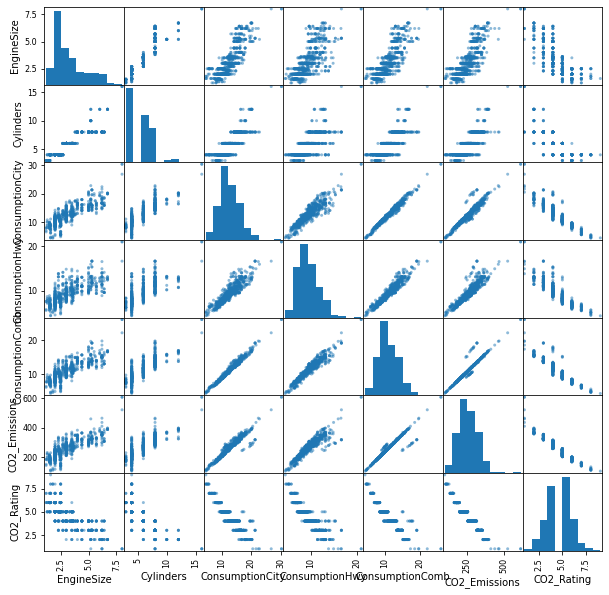

In [4]:
# Scatter-matrix of all numerical values
# Select only the numerical columns
numerical_cols = cars.select_dtypes(include=[float, int])

# Create the scatter matrix
pd.plotting.scatter_matrix(numerical_cols, figsize=(10,10))
plt.show()

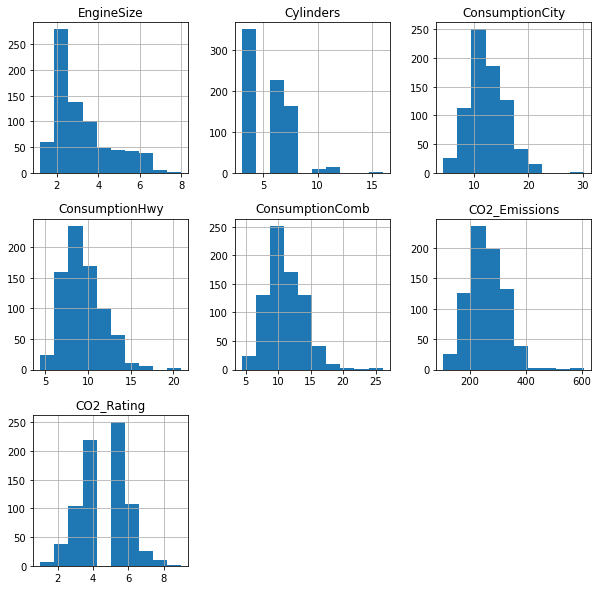

In [5]:
# Histograms of all numerical values
numerical_cols.hist(figsize=(10,10))
plt.show()

In [6]:
# Unique values of the categorical values
# Select only the categorical columns
categorical_cols = cars.select_dtypes(include=['category', 'object'])

# Loop over the columns and print unique values
for col in categorical_cols:
    print(f'Unique values in {col}: {cars[col].unique()} \n')

Unique values in Make: ['Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti' 'Buick'
 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis' 'GMC'
 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land Rover'
 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI' 'Mitsubishi'
 'Nissan' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo'] 

Unique values in Model: ['Giulia' 'Giulia AWD' 'Giulia Quadrifoglio' 'Stelvio' 'Stelvio AWD'
 'Stelvio AWD Quadrifoglio' 'DB11 V8' 'DB11 V12' 'DBS V12' 'DBX V8'
 'DBX707' 'Vantage V8' 'V12 Vantage' 'A3 40 TFSI quattro'
 'A4 Sedan 45 TFSI quattro' 'A4 allroad 45 TFSI quattro'
 'A5 Cabriolet 45 TFSI quattro' 'A5 Coupé 45 TFSI quattro'
 'A5 Sportback 45 TFSI quattro' 'A6 45 TFSI quattro' 'A6 55 TFSI quattro'
 'A6 allroad 55 TFSI quattro' 'A7 Sportback 55 TFSI quattro'
 'A8 L Sedan 55 TFSI quattro' 'Q3 45 TFSI quattro' 'Q5 40 TFSI quattro'
 'Q5 45 TFSI quattro' 'Q5 Sportback 45 TFSI quattro' 'Q7 45 TFSI quattro'
 

### 2. Predicting CO$_2$ emissions in function of car fuel consumption

The aim is to build a linear model predicting the `CO2_Emissions` in function of the `ConsumptionComb`:
$$
\text{CO2_Emissions} = \beta_0 + \beta_1 \cdot \text{ConsumptionComb}
$$

Steps:
* Build the features matrix and target values vector
* Split the set into a training and a test set (you can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
* Build and train the model using your training set (you can use [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
* Evaluate the trained model on your test set providing graphs and computing the RMSE (you can use [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) but make sure to read the documentation to get indeed the RMSE, or build your own function)
* By performing none-parametric bootstrapping estimate the error on the two model parameters $\beta_0$ and $\beta_1$

In [7]:
# Features matrix X and target values y

X = np.c_[cars.ConsumptionComb]
y = np.c_[cars.CO2_Emissions]

In [8]:
# Training and test set
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Defintion of the model and training

# Create a linear regression object
model = LinearRegression()

# Train your model on the training set
model.fit(X_train, y_train)


LinearRegression()

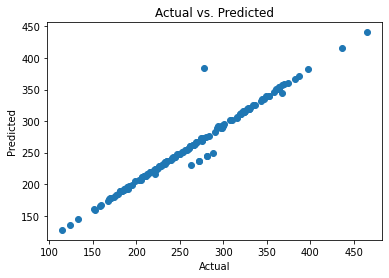

In [10]:
# Evaluation on the test set of the trained model


# Make predictions on the test set
y_pred = model.predict(X_test)

# Provide a plot of the predicted CO2_Emissions versus the actual CO2_Emissions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [11]:
# Compute the root mean square error (RMSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 13.383777173979107


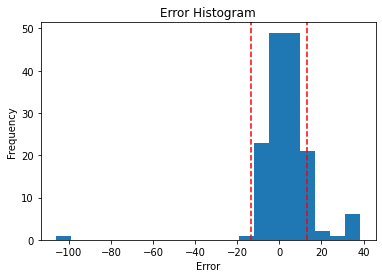

In [12]:
# Plot on a graph the errors of each sample in the test set and add two horizontal lines showing +RMSE and -RMSE
# Compute the errors for each sample
errors = y_test - y_pred

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a histogram of the errors
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Histogram')
plt.axvline(x=rmse, color='r', linestyle='--')
plt.axvline(x=-rmse, color='r', linestyle='--')
plt.show()

In [13]:
# Sensitivity analysis (using none-parametric bootstrapping)
#
# Create a function to draw a random sample from the full data set
# You can simply use train_test_split for this operation

def bootstrap(X, y):
    """
    Returns a random sample (X_rdm, y_rdm) from the full data set (X, y)
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    return (X_train, y_train) 
    pass

In [14]:
# By drawing 10000 random sub-sets, build two lists beta_0 and beta_1 which contains the model parameters computed for each drawn sub-set
# You can use the following template as start point

beta_0 = []
beta_1 = []
for i in range(10000):
    X_train, y_train = bootstrap(X, y)
    modal = LinearRegression().fit(X_train, y_train)
    b0 = model.intercept_[0]
    b1 = model.coef_[0][0]
    beta_0.append(b0)
    beta_1.append(b1)

In [15]:
# Compute and display the mean values and standard errors of the tow model parameters beta_0 and beta_1


# compute mean and standard deviation of beta_0 and beta_1
mean_beta_0 = np.mean(beta_0)
mean_beta_1 = np.mean(beta_1)
std_beta_0 = np.std(beta_0)
std_beta_1 = np.std(beta_1)

# compute standard error of beta_0 and beta_1
se_beta_0 = std_beta_0 / np.sqrt(len(beta_0))
se_beta_1 = std_beta_1 / np.sqrt(len(beta_1))

# display the results
print('beta_0: mean = {:.2f}, std = {:.2f}, se = {:.2f}'.format(mean_beta_0, std_beta_0, se_beta_0))
print('beta_1: mean = {:.2f}, std = {:.2f}, se = {:.2f}'.format(mean_beta_1, std_beta_1, se_beta_1))

# Make sure to add the correct physical units to your printouts


beta_0: mean = 24.42, std = 0.00, se = 0.00
beta_1: mean = 21.03, std = 0.00, se = 0.00


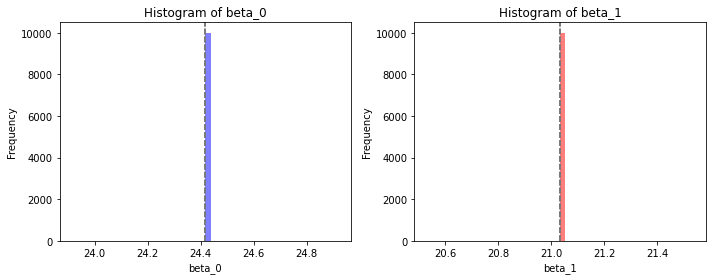

In [16]:
# Give an appropriate visual representation of this result (e.g. plotting the histograms of beta_0 and beta_1)
# plot histograms of beta_0 and beta_1
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(beta_0, bins=50, color='blue', alpha=0.5)

ax[0].set_xlabel('beta_0')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of beta_0')

ax[1].hist(beta_1, bins=50, color='red', alpha=0.5)
ax[1].set_xlabel('beta_1')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of beta_1')

# plot mean values and standard errors as vertical lines
ax[0].axvline(x=mean_beta_0, color='black', linestyle='--')
ax[0].axvline(x=mean_beta_0 + se_beta_0, color='gray', linestyle='--')
ax[0].axvline(x=mean_beta_0 - se_beta_0, color='gray', linestyle='--')

ax[1].axvline(x=mean_beta_1, color='black', linestyle='--')
ax[1].axvline(x=mean_beta_1 + se_beta_1, color='gray', linestyle='--')
ax[1].axvline(x=mean_beta_1 - se_beta_1, color='gray', linestyle='--')

plt.tight_layout()
plt.show()




### 3. Predicting the car fuel consumption in function of car characteristics

The aim is to build a linear model predicting the `ConsumptionComb` in function of the car characteristics `EngineSize`, `Cylinders` and `FuelType`.

The model will be a linear model with polynomial base functions (use [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to transform the features).

To encode the categorical feature `FuelType` we will use one-hot encoding with [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

Steps:
* Build the features matrix and target values vector
* Split the set into a training and a test set (you can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
* Build a [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which will one-hot encode the categorical feature `FuelType`, apply the `PolynomialFeatures` transformer on the numerical features `EngineSize` and `Cylinders` and afterwards perform linear regression with [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).
* Using cross validation, find the best degree n of the polynomial for the `PolynomialFeatures` transformer
* Build and train the model using your training set and optimal degree n
* Evaluate the trained model on your test set providing graphs and computing the RMSE (you can use [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) but make sure to read the documentation to get indeed the RMSE, or build your own function)

In [17]:
# Features matrix X and target values y

X = cars.loc[:,["EngineSize", "Cylinders", "FuelType"]]
y = cars.ConsumptionComb

In [18]:
# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Pipline to transform the features (PolynomialFeatures for numerical and OneHotEncoder for categorical features) and feed a LinearRegression regressor
# Use the template below
#
# Note: make sure to include the categories option in the OneHotEncoder as otherwhise your cross validation will run into problems

def createModel(n):
    """
    Creates and returns pipeline for the model
    n = degree of polynomial of the PolynomialFeatures transformer
    """
    # Create a column transformer to one-hot encode the FuelType column and apply polynomial features to the EngineSize and Cylinders columns
    preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['FuelType']),
        ('poly', PolynomialFeatures(), ['EngineSize', 'Cylinders'])
    ])

    # Create a pipeline with the preprocessor and LinearRegression
    pipeline= Pipeline(steps=[('preprocessor', preprocessor), ('poly', PolynomialFeatures(degree=n)), ('regressor', LinearRegression())])
    return pipeline


![Pipeline](img/pipeline1.png "Visual representation of the pipeline")


In [20]:
# Use cross validation (using your training set) to find the best degree n of of the polynomial of the PolynomialFeatures transformer
#


pipeline= createModel(1)
# Define the scoring metric to use in cross-validation
scoring_metric = 'neg_root_mean_squared_error'

# Define the degrees of polynomial features to search over in cross-validation
degrees = np.arange(1, 10)

# Perform cross-validation to find the mean RMSE for each degree of polynomial features
cv_results = []
for degree in degrees:
    pipeline.steps[1] = ('poly', PolynomialFeatures(degree=degree))
    cv_scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring_metric)
    cv_results.append(-1 * np.mean(cv_scores['test_score']))

# Print the mean RMSE for each degree of polynomial features found in cross-validation
for i, degree in enumerate(degrees):
    print('Degree of polynomial features:', degree, 'Mean RMSE:', cv_results[i])

# Find the best degree of polynomial features based on cross-validation
best_degree = degrees[np.argmin(cv_results)]
print('Best degree of polynomial features:', best_degree)

Degree of polynomial features: 1 Mean RMSE: 1.4808525116128226
Degree of polynomial features: 2 Mean RMSE: 2.6380912074724447
Degree of polynomial features: 3 Mean RMSE: 2.0109987824053674
Degree of polynomial features: 4 Mean RMSE: 36.28937939789923
Degree of polynomial features: 5 Mean RMSE: 52.824944581724274
Degree of polynomial features: 6 Mean RMSE: 91.7117460281696
Degree of polynomial features: 7 Mean RMSE: 182.0749079257335
Degree of polynomial features: 8 Mean RMSE: 56.18920419344877
Degree of polynomial features: 9 Mean RMSE: 5.948634895033176
Best degree of polynomial features: 1


In [21]:
# Train your model with the optimal degree n using your training set

final_pipeline= createModel(best_degree)
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['FuelType']),
                                                 ('poly', PolynomialFeatures(),
                                                  ['EngineSize',
                                                   'Cylinders'])])),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor', LinearRegression())])

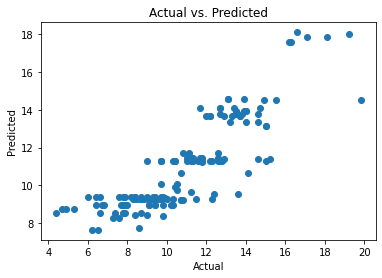

In [22]:
# Evaluation on the test set of the trained model
#


y_pred = final_pipeline.predict(X_test)

# Provide a plot of the predicted combined fuel consumption versus the actual combined fuel consumption
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [23]:
# Compute the root mean square error (RMSE) on the test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test RMSE:', test_rmse)

Test RMSE: 1.504548715341499


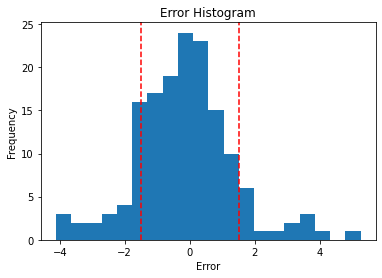

In [24]:
# Plot on a graph the errors of each sample in the test set and add two horizontal lines showing +RMSE and -RMSE
errors = y_test - y_pred

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Create a histogram of the errors
plt.hist(errors, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Histogram')
plt.axvline(x=rmse, color='r', linestyle='--')
plt.axvline(x=-rmse, color='r', linestyle='--')
plt.show()

### 4. Predicting the car fuel consumption in function of car characteristics

The aim is to build a KNN regression model predicting the `ConsumptionComb` in function of the car characteristics `EngineSize`, `Cylinders`, `FuelType` and `Class`.

The model will be a KNN model. Recall that a KNN model requires scaling of the numerical features in order to bring them all in a similar scale. In our case we will use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

To encode the categorical features `FuelType` and `Class` we will use one-hot encoding with [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

Steps:
* Build the features matrix and target values vector
* Split the set into a training and a test set (you can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
* Build a [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which will one-hot encode the categorical features `FuelType` and `class`, apply a `StandardScaler` transformer on the numerical features `EngineSize` and `Cylinders` and afterwards perform KNN regression with [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)).
* Using cross validation, find the the number K of nearest neighbors to use in the `KNeighborsRegressor`
* Build and train the model using your training set and the number K of nearest neighbors to use in the `KNeighborsRegressor`
* Evaluate the trained model on your test set providing graphs and computing the RMSE (you can use [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) but make sure to read the documentation to get indeed the RMSE, or build your own function)

In [25]:
# Features matrix X and target values y

X = cars.loc[:,["EngineSize", "Cylinders", "FuelType", "Class"]]
y = cars.ConsumptionComb

In [26]:
# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Pipline to transform the features (StandardScaler for numerical and OneHotEncoder for categorical features) and feed a KNeighborsRegressor regressor
# Use the template below
#
# Note: make sure to include the categories option in the OneHotEncoder as otherwhise your cross validation will run into problems

def createModel(n):
    """
    Creates and returns pipeline for the model
    n = degree of polynomial of the PolynomialFeatures transformer
    """

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['EngineSize', 'Cylinders']),
        ('cat', OneHotEncoder(), ['FuelType', 'Class'])
    ])

    # Define the pipeline with KNN regression
    knn_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ])

    return knn_pipeline
    pass

![Pipeline](img/pipeline2.png "Visual representation of the pipeline")

In [28]:
# Use cross validation (using your training set) to find the number K of nearest neighbors to use in the KNeighborsRegressor
#

knn_pipeline = createModel(1)


# Define the range of K values to test in cross-validation
k_values = list(range(1, 21))

# Perform cross-validation to find the optimal K value
cv_results = []
for k in k_values:
    knn_pipeline.set_params(regressor__n_neighbors=k)
    scores = cross_validate(knn_pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_results.append(-scores['test_score'].mean())

# Find the optimal K value with the minimum RMSE
optimal_k = k_values[cv_results.index(min(cv_results))]
print('Optimal K value:', optimal_k)


Optimal K value: 4


In [29]:
# Train your model with the optimal number K of nearest neighbors

knn_pipeline.set_params(regressor__n_neighbors=optimal_k)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['EngineSize', 'Cylinders']),
                                                 ('cat', OneHotEncoder(),
                                                  ['FuelType', 'Class'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=4))])

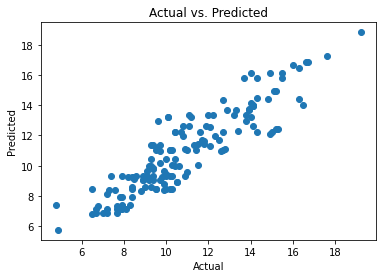

In [30]:
# Evaluation on the test set of the trained model
#

y_pred = knn_pipeline.predict(X_test)

# Provide a plot of the predicted combined fuel consumption versus the actual combined fuel consumption
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [31]:
# Compute the root mean square error (RMSE) on the test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Test RMSE:', test_rmse)

Test RMSE: 1.1999404260811413
